# Simple orders analysis

In [1]:
# Import Modules 

import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%load_ext autoreload
%autoreload 2

In [28]:
# Import your newly coded _order_ training set
from olist.order import Order
orders = Order().get_training_data(with_distance_seller_customer=True)

## 1 - Inspect features

In [11]:
orders.describe()

,wait_time,expected_wait_time,delay_vs_expected,dim_is_five_star,dim_is_three_star,dim_is_two_star,dim_is_one_star,review_score,number_of_products,number_of_sellers,price,freight_value
count,96353.000000,96353.000000,96353.000000,96353.000000,96353.000000,96353.000000,96353.000000,96353.000000,96353.000000,96353.000000,96353.000000,96353.000000
mean,12.522869,23.741881,0.754903,0.592187,0.082623,0.030523,0.097610,4.155688,1.141687,1.013918,136.654623,22.757810
std,9.457183,8.759019,4.656481,0.491431,0.275313,0.172023,0.296788,1.284979,0.535362,0.123616,207.444085,21.496018
min,0.533414,2.008009,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.850000,0.000000
25%,6.763530,18.335243,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,1.000000,45.900000,13.840000
50%,10.211944,23.233113,0.000000,1.000000,0.000000,0.000000,0.000000,5.000000,1.000000,1.000000,86.000000,17.160000
75%,15.685278,28.411979,0.000000,1.000000,0.000000,0.000000,0.000000,5.000000,1.000000,1.000000,149.900000,23.990000
max,208.351759,155.135463,188.975081,1.000000,1.000000,1.000000,1.000000,5.000000,21.000000,5.000000,13440.000000,1794.960000


In [12]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96353 entries, 0 to 96360
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            96353 non-null  object 
 1   wait_time           96353 non-null  float64
 2   expected_wait_time  96353 non-null  float64
 3   delay_vs_expected   96353 non-null  float64
 4   order_status        96353 non-null  object 
 5   dim_is_five_star    96353 non-null  int64  
 6   dim_is_three_star   96353 non-null  int64  
 7   dim_is_two_star     96353 non-null  int64  
 8   dim_is_one_star     96353 non-null  int64  
 9   review_score        96353 non-null  int64  
 10  number_of_products  96353 non-null  int64  
 11  number_of_sellers   96353 non-null  int64  
 12  price               96353 non-null  float64
 13  freight_value       96353 non-null  float64
dtypes: float64(5), int64(7), object(2)
memory usage: 11.0+ MB


In [19]:
for variable in orders.select_dtypes(exclude = ["object"]):
    print (variable)

wait_time
expected_wait_time
delay_vs_expected
dim_is_five_star
dim_is_three_star
dim_is_two_star
dim_is_one_star
review_score
number_of_products
number_of_sellers
price
freight_value


 Distribution of wait_time :


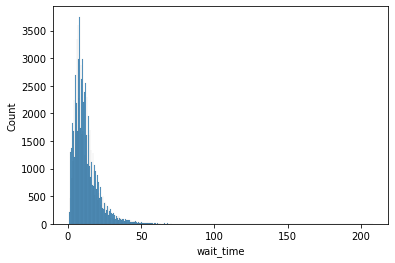

 Distribution of expected_wait_time :


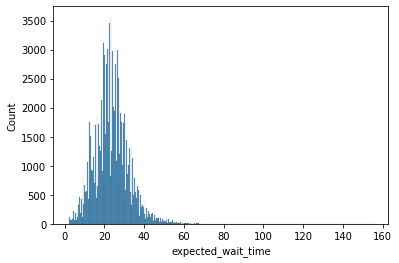

 Distribution of delay_vs_expected :


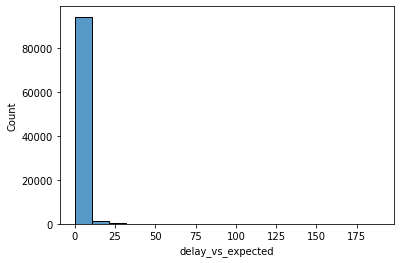

 Distribution of dim_is_five_star :


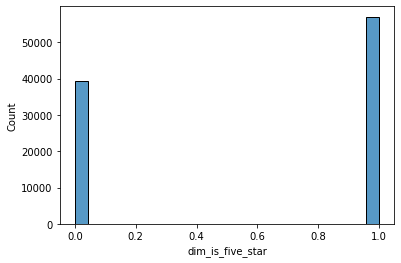

 Distribution of dim_is_three_star :


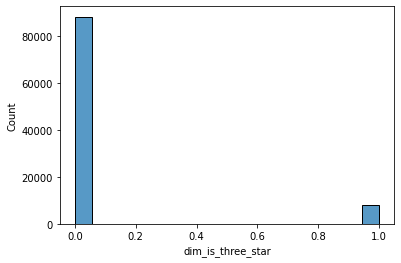

 Distribution of dim_is_two_star :


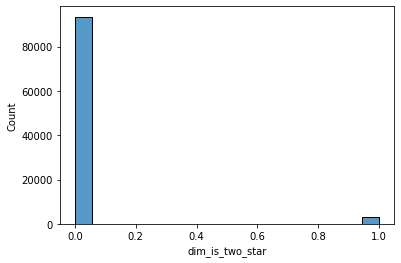

 Distribution of dim_is_one_star :


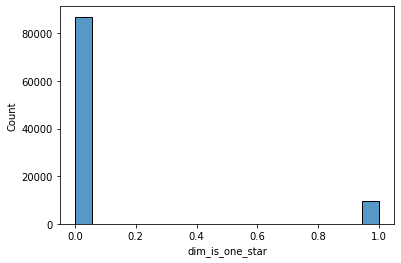

 Distribution of review_score :


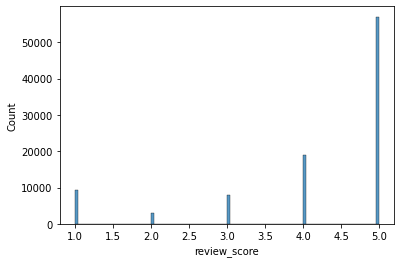

 Distribution of number_of_products :


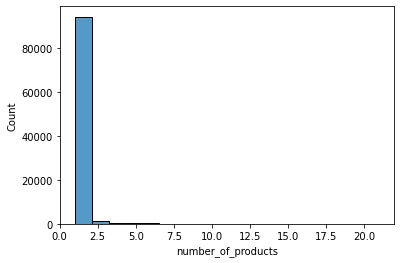

 Distribution of number_of_sellers :


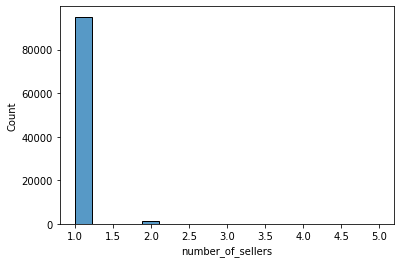

 Distribution of price :


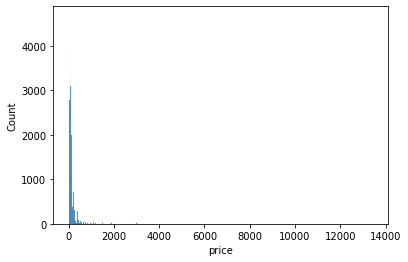

 Distribution of freight_value :


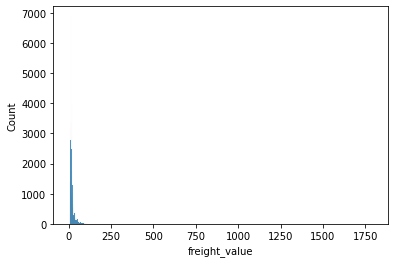

In [21]:
# Plot distribution for the numerical features available in the dataset
for variable in orders.select_dtypes(exclude = ["object"]).columns:
    print(f" Distribution of {variable} :")
    sns.histplot(orders[variable])
    plt.show()


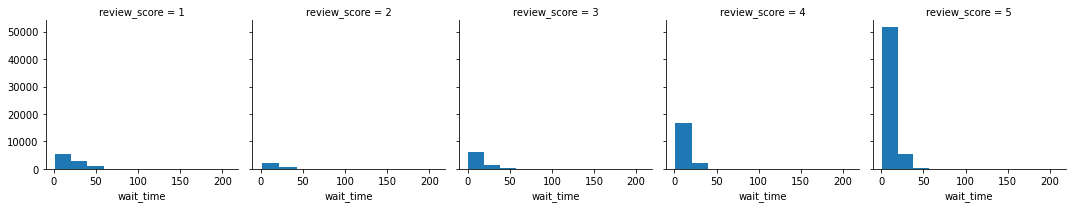

In [22]:
g = sns.FacetGrid(data=orders, col="review_score")
g.map(plt.hist, "wait_time")

<AxesSubplot:xlabel='price', ylabel='Density'>

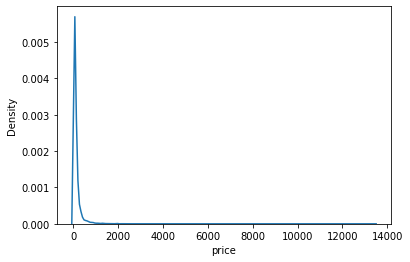

In [25]:
sns.kdeplot(orders['price'])

<AxesSubplot:xlabel='freight_value', ylabel='Density'>

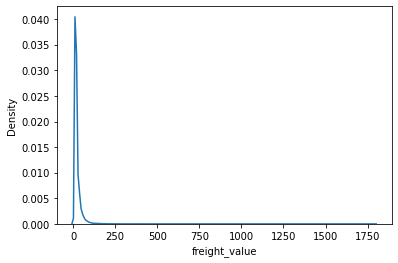

In [26]:
sns.kdeplot(orders['freight_value'])

<AxesSubplot:xlabel='distance_seller_customer', ylabel='Density'>

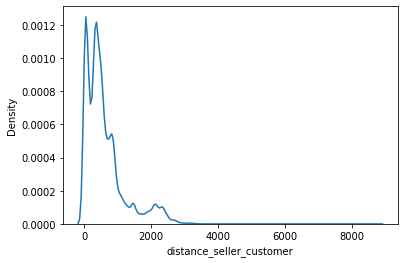

In [29]:
sns.kdeplot(orders['distance_seller_customer'])

<AxesSubplot:>

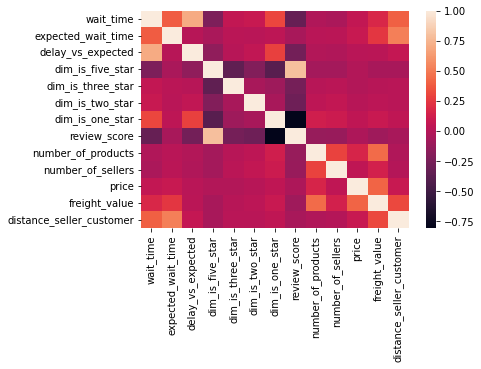

In [34]:
#correlation plot
sns.heatmap(orders.corr())

<AxesSubplot:>

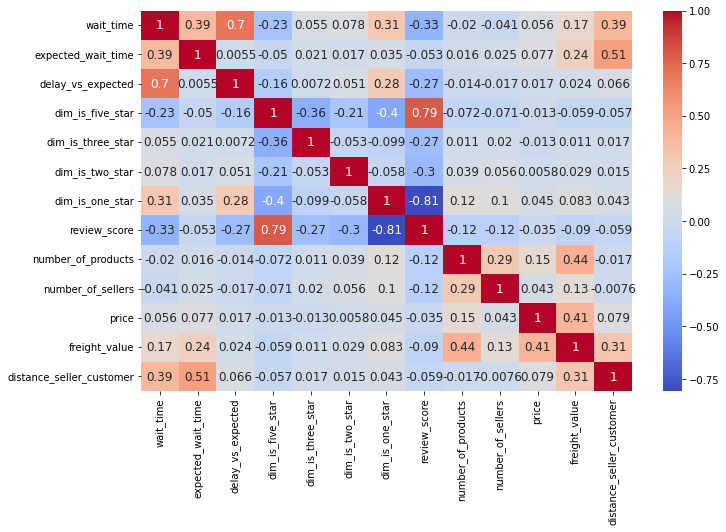

In [35]:
# Correlation plot 
plt.figure(figsize=(11,7))
sns.heatmap(orders.corr(), cmap='coolwarm', annot = True, annot_kws={"size": 12})

In [36]:
round(np.abs(orders.corr()['review_score']).sort_values(ascending = False),2)

review_score                1.00
dim_is_one_star             0.81
dim_is_five_star            0.79
wait_time                   0.33
dim_is_two_star             0.30
delay_vs_expected           0.27
dim_is_three_star           0.27
number_of_products          0.12
number_of_sellers           0.12
freight_value               0.09
distance_seller_customer    0.06
expected_wait_time          0.05
price                       0.03
Name: review_score, dtype: float64

In [37]:
round(orders.corr()['review_score'],2)

wait_time                  -0.33
expected_wait_time         -0.05
delay_vs_expected          -0.27
dim_is_five_star            0.79
dim_is_three_star          -0.27
dim_is_two_star            -0.30
dim_is_one_star            -0.81
review_score                1.00
number_of_products         -0.12
number_of_sellers          -0.12
price                      -0.03
freight_value              -0.09
distance_seller_customer   -0.06
Name: review_score, dtype: float64

- high correlation with 
    - wait_time 
    - delay_vs_expect

## Simple regression of review_score against delivery duration

In [38]:
sample = orders.sample(10000, random_state=42)

(0.0, 5.83086611415469)

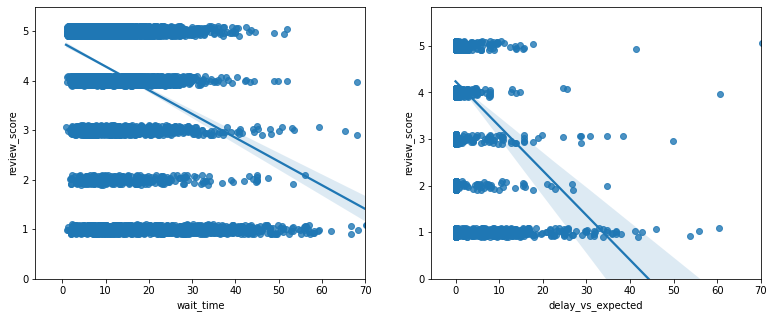

In [39]:
plt.figure(figsize=(13,5))

plt.subplot(1,2,1)
sns.regplot(x = sample.wait_time, y= sample.review_score, y_jitter=.1)
plt.xlim(right=70)
plt.ylim(bottom=0)

plt.subplot(1,2,2)
sns.regplot(x = sample.delay_vs_expected, y= sample.review_score, y_jitter=.1)
plt.xlim(right=70)
plt.ylim(bottom=0)

the longer the waiting time and/or the delay, the lower the review score